## Q1: Traditional Machine Learning Approach (logistic Regression)

## Aim
To predict whether a space mission was successful (1) or not successful (0).
A traditional machine learning baseline is trained and evaluated 

In [9]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from py.functions import load_missions_csv, preprocess_missions, train_test

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
#loading raw dataset
df = load_missions_csv("../data/mission_launches.csv")

#preprocess into features (X) and labels(y)
X, y = preprocess_missions(df)

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())

X shape: (958, 80)
y distribution:
 y
1    906
0     52
Name: count, dtype: int64


## Train / Test Split and Feature Scaling

We use a stratified train/test split to preserve the ratio of successful vs unsuccessful missions.
We also standardise features to ensure fair contribution to the logistic regression model.


In [12]:
#train and test split
X_train, X_test, y_train, y_test, scaler = train_test(X, y)

print("Train size:", X_train.shape, " Test size:", X_test.shape)

Train size: (766, 80)  Test size: (192, 80)


## Model: Logistic Regression

Logistic regression is a traditional baseline for binary classification.
it is interpretable, fast, and provides a useful comparision point for Q2 

In [15]:
#creating a logistic regression model (best fit for this type of data)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train) #training the model

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [18]:
#prediction of class labels on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] #predicted probabilities on the test set

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9427083333333334
ROC-AUC: 0.6722527472527472

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.95      0.99      0.97       182

    accuracy                           0.94       192
   macro avg       0.47      0.50      0.49       192
weighted avg       0.90      0.94      0.92       192



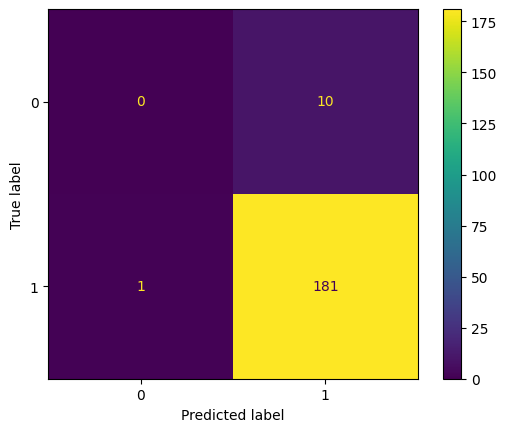

In [17]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Conclusion

Logistic regression gives a strong traditional baseline for prediction mission success.The model achieves reasonable accuracy which means it recognises
important patterns in the data. However, as it is a linear model it may struggle to represent more complex interactions between features such as
organisation, rocket status, and launch year. This is what gives neural network models an advantage.